In [26]:
import pandas as pd

In [29]:
df = pd.read_csv("data/dataOPTI.csv", index_col=["Type"])

# Without LV LL SL

In [161]:
#Variable to optimize
opti = df[['LV','LL','SL']]
opti.head()

,LV,LL,SL
Type,,,
A100-3-1,1,1,1
A100-3-10,1,1,1
A100-3-100,1,1,1
A100-3-101,1,1,0
A100-3-102,1,1,1


In [162]:
tmp = df.drop(columns=['LV','LL','SL'],axis=1) #drop variables to optimize

In [163]:
planning = pd.read_csv("planning/planning.csv", index_col=['Unnamed: 0']) #planning of each home appliance
planning

,11:00:00 PM,12:00:00 AM,1:00:00 AM,2:00:00 AM,3:00:00 AM,4:00:00 AM,5:00:00 AM,6:00:00 AM,7:00:00 AM,8:00:00 AM,...,1:00:00 PM,2:00:00 PM,3:00:00 PM,4:00:00 PM,5:00:00 PM,6:00:00 PM,7:00:00 PM,8:00:00 PM,9:00:00 PM,10:00:00 PM
TV,0.0200,0.0029,0.0029,0.0029,0.0029,0.0029,0.0029,0.0029,0.0200,0.0300,...,0.0500,0.0100,0.0100,0.0100,0.0100,0.0500,0.1000,0.2500,0.1500,0.1000
FG1,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
CE1,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
CG,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
FO,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,...,0.1000,0.0150,0.0150,0.0150,0.0150,0.1000,0.2000,0.2000,0.1000,0.0010
PL,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0500,0.0500,...,0.1500,0.0500,0.0160,0.0160,0.0160,0.0160,0.1000,0.1500,0.1000,0.0500
FG2,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
CE2,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417


In [34]:
heures = ['11:00:00 PM','12:00:00 AM','1:00:00 AM','2:00:00 AM','3:00:00 AM','4:00:00 AM','5:00:00 AM',
    '6:00:00 AM','7:00:00 AM','8:00:00 AM','9:00:00 AM','10:00:00 AM','11:00:00 AM','12:00:00 PM',
    '1:00:00 PM','2:00:00 PM','3:00:00 PM','4:00:00 PM','5:00:00 PM','6:00:00 PM','7:00:00 PM','8:00:00 PM',
    '9:00:00 PM','10:00:00 PM']

In [35]:
electro = {'TV':0.4,
            'FG1':0.45,
            'CE1':13.2,
            'CG':0.5,
            'FO':0.85,
            'PL':0.85,
            'FG2':0.45,
            'CE2':18
        }

In [165]:
tmp[heures]=0

In [166]:
conso = tmp[heures]

In [167]:
for c in conso.index:
    for i in heures:
        sum = 0
        for a in electro:
            sum = sum + tmp[a].loc[c] * electro[a] * planning[i].loc[a]
        conso[i].loc[c] = sum

/tmp/ipykernel_7582/1469331680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso[i].loc[c] = sum


<AxesSubplot:>

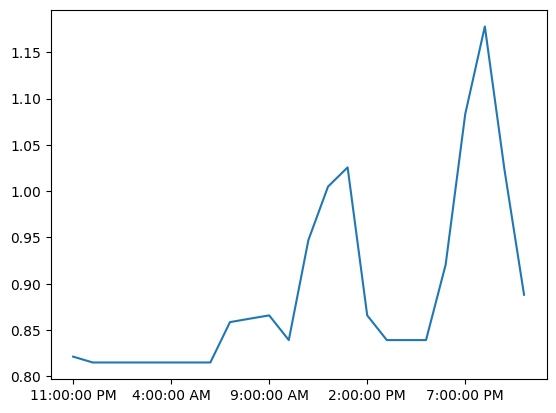

In [168]:
conso.mean(axis=0).plot()

In [140]:
conso.sum(axis=1)

Type
A100-3-1      34.22665
A100-3-10     16.21225
A100-3-100    15.76189
A100-3-101    34.27669
A100-3-102    15.76189
                ...   
M90-4-95      16.21225
M90-4-96      16.21225
M90-4-97      34.22665
M90-4-98      34.27669
M90-4-99      16.71265
Length: 20741, dtype: float64

In [141]:
conso.to_csv('conso/conso.csv')

# LV LL SL averaged on the day (1/24)

In [43]:
planning2 = pd.read_csv("planning/planning +LVLLSL.csv", index_col=['Unnamed: 0']) #planning of each home appliance + variables to optimize
planning2

,11:00:00 PM,12:00:00 AM,1:00:00 AM,2:00:00 AM,3:00:00 AM,4:00:00 AM,5:00:00 AM,6:00:00 AM,7:00:00 AM,8:00:00 AM,...,1:00:00 PM,2:00:00 PM,3:00:00 PM,4:00:00 PM,5:00:00 PM,6:00:00 PM,7:00:00 PM,8:00:00 PM,9:00:00 PM,10:00:00 PM
LV,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
LL,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
SL,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
TV,0.0200,0.0029,0.0029,0.0029,0.0029,0.0029,0.0029,0.0029,0.0200,0.0300,...,0.0500,0.0100,0.0100,0.0100,0.0100,0.0500,0.1000,0.2500,0.1500,0.1000
FG1,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
CE1,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
CG,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
FO,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,...,0.1000,0.0150,0.0150,0.0150,0.0150,0.1000,0.2000,0.2000,0.1000,0.0010
PL,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0500,0.0500,...,0.1500,0.0500,0.0160,0.0160,0.0160,0.0160,0.1000,0.1500,0.1000,0.0500
FG2,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417


In [44]:
electro2 = {'LV':0.7, #averaged daily 
            'LL': 0.5,
            'SL': 0.96,
            'TV':0.4,
            'FG1':0.45,
            'CE1':13.2,
            'CG':0.5,
            'FO':0.85,
            'PL':0.85,
            'FG2':0.45,
            'CE2':18
        }

In [45]:
tmp = df
tmp[heures] = 0
conso2 = tmp[heures]

In [46]:
for c in conso2.index:
    for i in heures:
        sum = 0
        for a in electro2:
            sum = sum + tmp[a].loc[c] * electro2[a] * planning2[i].loc[a]
        conso2[i].loc[c] = sum

/tmp/ipykernel_20530/1145776830.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

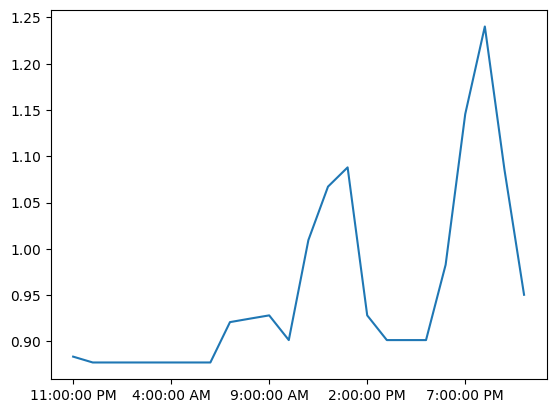

In [159]:
conso2.mean(axis=0).plot()

In [169]:
conso2.to_csv('conso/conso2.csv')

# LV LL SL with "logical" distribution

In [30]:
planning3 = pd.read_csv("planning/planning +LVLLSL2.csv", index_col=['Unnamed: 0']) #planning of each home appliance + variables to optimize
planning3

,11:00:00 PM,12:00:00 AM,1:00:00 AM,2:00:00 AM,3:00:00 AM,4:00:00 AM,5:00:00 AM,6:00:00 AM,7:00:00 AM,8:00:00 AM,...,1:00:00 PM,2:00:00 PM,3:00:00 PM,4:00:00 PM,5:00:00 PM,6:00:00 PM,7:00:00 PM,8:00:00 PM,9:00:00 PM,10:00:00 PM
LV,0.0079,0.0079,0.0079,0.0079,0.0079,0.0079,0.0079,0.0079,0.0079,0.0079,...,0.1700,0.1700,0.1700,0.0079,0.0079,0.0079,0.0079,0.0079,0.1700,0.1700
LL,0.0200,0.0200,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200,0.0671,...,0.0571,0.0571,0.0671,0.0671,0.0771,0.0771,0.0771,0.0671,0.0571,0.0571
SL,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0833,...,0.0833,0.0833,0.0000,0.0000,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
TV,0.0200,0.0029,0.0029,0.0029,0.0029,0.0029,0.0029,0.0029,0.0200,0.0300,...,0.0500,0.0100,0.0100,0.0100,0.0100,0.0500,0.1000,0.2500,0.1500,0.1000
FG1,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
CE1,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
CG,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417
FO,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,...,0.1000,0.0150,0.0150,0.0150,0.0150,0.1000,0.2000,0.2000,0.1000,0.0010
PL,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0500,0.0500,...,0.1500,0.0500,0.0160,0.0160,0.0160,0.0160,0.1000,0.1500,0.1000,0.0500
FG2,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,...,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417


In [36]:
tmp = df
tmp[heures] = 0
conso3 = tmp[heures]

In [37]:
for c in conso3.index:
    for i in heures:
        sum = 0
        for a in electro2:
            sum = sum + tmp[a].loc[c] * electro2[a] * planning3[i].loc[a]
        conso3[i].loc[c] = sum

/tmp/ipykernel_20530/2659698742.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

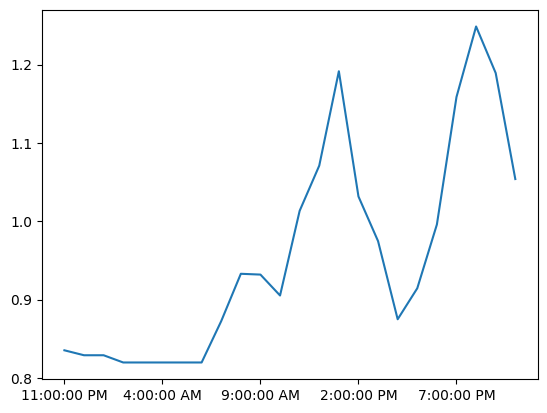

In [38]:
conso3.mean(axis=0).plot()

In [39]:
conso3.to_csv('conso/conso3.csv')

In [40]:
conso = pd.read_csv('conso/conso.csv',index_col="Type")
conso2 = pd.read_csv('conso/conso2.csv',index_col="Type")
conso3 = pd.read_csv('conso/conso3.csv',index_col="Type")

consoDF = pd.DataFrame(data=[conso.mean(axis=0),conso2.mean(axis=0),conso3.mean(axis=0)],index=["Withtout LV LL SL","LV LL SL averaged","LV LL SL logical"])


In [41]:
consoDF.to_csv('conso/consoDF.csv')

In [42]:
import plotly.express as px

consoDFmelt = consoDF.melt(ignore_index=False)
fig = px.line(consoDFmelt, x="variable", y="value", color=consoDFmelt.index)

fig.update_layout(
    title="Averaged daily electrical comsuption per habitation",
    xaxis_title="Time",
    yaxis_title="kW",
    legend_title="",
)

fig.show()